Programació per a *Data Science*
============================

Unitat 4: Llibreries científiques en Python - pandas
--------------------------------------------------

Instruccions d'ús
-----------------

A continuació es presentaran explicacions i exemples d'ús de la
llibreria pandas. Recordeu que podeu anar executant els exemples per
obtenir-ne els resultats.

Introducció
-----------

Pandas és una llibreria de Python que ens ofereix una interfície d'alt
nivell per manipular i analitzar dades. Podeu trobar-ne la documentació
completa al següent
[enllaç](http://pandas.pydata.org/pandas-docs/stable/).

### Primers passos

Per poder utilitzar la llibreria, en primer lloc cal importar-la:

In [1]:
# A la línia següent, importem pandas i li donem un nom més curt 
# perquè ens sigui més còmode fer les crides.
import pandas as pd
# Importem també NumPy, ja que la farem servir en algun dels exemples.
import numpy as np

### Estructures de dades bàsiques

Pandas proveeix de tres estructures de dades: la sèrie, el _dataframe_ i
antigament el panell (ara, els _dataframes_ i les _sèries_ amb índexs multinivell). Vegem les característiques de cadascuna.

Una **sèrie** és un vector **unidimensional** amb **etiquetes** als eixos i
dades **homogènies**.

Repassem què impliquen cadascuna d'aquestes característiques amb uns
exemples.

La sèrie ens permet representar un conjunt de dades unidimensionals,
per exemple, una llista d'enters, decimals o de cadenes de caràcters:

In [2]:
print(pd.Series([1, 1, 2, 3, 5]))

0    1
1    1
2    2
3    3
4    5
dtype: int64


In [3]:
print(pd.Series([1.5, 3.5, 4.75]))

0    1.50
1    3.50
2    4.75
dtype: float64


Les dades d'una sèrie han de ser homogènies, és a dir, han de ser del
mateix tipus. Als exemples anteriors, la primera sèrie estava formada
per enters (int64), mentre que la segona contenia nombres en punt flotant
(float).

De totes maneres, si intentem crear una sèrie amb dades de diferents
tipus, podrem fer-ho, ja que pandas crearà una sèrie amb el tipus més
general:

In [4]:
# Barregem enters i 'floats', la sèrie és de tipus 'float'.
print(pd.Series([1, 2, 3.5]))

0    1.0
1    2.0
2    3.5
dtype: float64


In [5]:
# Barregem enters, 'floats' i 'strings', la sèrie és de tipus 'object'.
print(pd.Series([1, 4.3, "data"]))

0       1
1     4.3
2    data
dtype: object


Finalment, la sèrie pot tenir etiquetes, de manera que podem accedir
als elements d'una sèrie tant a partir del seu índex com de la seva
etiqueta.

In [6]:
# Creem una sèrie etiquetada a partir d'un diccionari.
s = pd.Series({"alice" : 2, "bob": 3, "eve": 5})
print(s)

# Accedim als elements de la sèrie a partir de la seva etiqueta.
print(s["alice"])

# Accedim als elements de la sèrie a partir del seu índex.
print(s[0])

alice    2
bob      3
eve      5
dtype: int64
2
2


In [7]:
# Creem una sèrie etiquetada a partir de dos vectors, un amb les dades i un altre amb les etiquetes.
print(pd.Series([2, 3, 5], index = ["alice", "bob", "eve"]))

alice    2
bob      3
eve      5
dtype: int64


La segona estructura de dades de pandas que presentarem és el _dataframe_.

Un _**dataframe**_ és una taula **bidimensional** amb **etiquetes** als eixos
i dades potencialment **heterogènies**. El _dataframe_ és l' estructura
principal de treball amb la llibreria pandas.

Vegem les característiques principals d'un _dataframe_ amb alguns
exemples.

A diferència d'una sèrie, un _dataframe_ és bidimensional:

In [8]:
print(pd.DataFrame([[1, 2, 3], [4, 5, 6]]))

   0  1  2
0  1  2  3
1  4  5  6


Igual que la sèrie, el _dataframe_ pot tenir etiquetes als eixos i podem
utilitzar diferents sintaxis per incloure les etiquetes al _dataframe_.

In [9]:
# Fem servir un diccionari per definir cada columna i una llista per indicar les etiquetes de les files.
d = {"alice" : [1953, 12, 3], "bob" : [1955, 11, 24], "eve" : [2011, 10, 10]}
print(pd.DataFrame(d, index=["year", "month", "day"]))

       alice   bob   eve
year    1953  1955  2011
month     12    11    10
day        3    24    10


In [10]:
# Fem servir una llista de llistes per a introduir les dades i dues llistes addicionals 
# per a indicar les etiquetes de files i les columnes.
a = [[1953, 12, 3], [1955, 11, 24], [2011, 10, 10]]
print(pd.DataFrame(a, columns=["year", "month", "day"], index = ["alice", "bob", "eve"]))

       year  month  day
alice  1953     12    3
bob    1955     11   24
eve    2011     10   10


Cadascuna de les columnes d'un _dataframe_ pot tenir tipus de dades
diferents, donant lloc a _dataframes_ heterogenis:

In [11]:
a = [[1953, "computer science", 3.5], [1955, "archeology", 3.8], [2011, "biology", 2.8]]
print(pd.DataFrame(a, columns=["year", "major", "average grade"], index = ["alice", "bob", "eve"]))

       year             major  average grade
alice  1953  computer science            3.5
bob    1955        archeology            3.8
eve    2011           biology            2.8


En versions anteriors de pandas, disposàvem del panell com a tercera estructura de dades. Un **panell** és una estructura de dades **tridimensional** que pot contenir **etiquetes** als eixos i pot ser **heterogènia**.

Actualment, l'ús dels panells està discontinuat, i fem servir sèries i _dataframes_ amb índexs multinivell per tal de representar estructures de dades de més de dues dimensions.

Vegem un exemple senzill d'ús d'índexs multinivell per a representar una
imatge.

In [12]:
img = [[[0, 0, 0], [0, 15, 0], [0, 0, 15], [15, 0, 0], [180, 180, 180]],
       [[200, 200, 200], [125, 1, 125], [100, 100, 2], [1, 152, 125], [15, 25, 20]]]

# Fem servir números per indexar les files i les columnes, i les lletres 
# "R", "G", "B" per indicar el contingut d'aquest color en cada píxel
index = pd.MultiIndex.from_product(
    [range(len(img)), range(len(img[0])), ["R", "G", "B"]], 
    names=['row', 'column', 'color'])

# Creem la sèrie amb l'índex multidimensional especificant les dades
# i els índex
s = pd.Series([x for row in img for col in row for x in col], 
               index=index)
s

row  column  color
0    0       R          0
             G          0
             B          0
     1       R          0
             G         15
             B          0
     2       R          0
             G          0
             B         15
     3       R         15
             G          0
             B          0
     4       R        180
             G        180
             B        180
1    0       R        200
             G        200
             B        200
     1       R        125
             G          1
             B        125
     2       R        100
             G        100
             B          2
     3       R          1
             G        152
             B        125
     4       R         15
             G         25
             B         20
dtype: int64

Visualitzem gràficament la imatge per entendre millor la representació
escollida. La imatge té dues files i cinc columnes i per a cada píxel utilitzem
tres valors numèrics per representar-ne el color.

Populating the interactive namespace from numpy and matplotlib


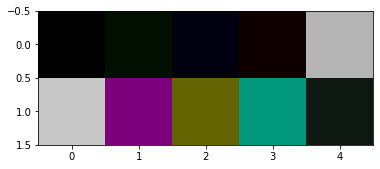

In [13]:
%pylab inline
from pylab import imshow
imshow(array(img, dtype=uint16), interpolation='nearest')

Operacions bàsiques sobre un _dataframe_
--------------------------------------

El _dataframe_ és l'estructura més usada a pandas. Vegem algunes de les
operacions que podem realitzar amb aquest.

### Lectura de dades d'un fitxer

Pandas ens permet carregar les dades d'un fitxer CSV directament a un
_dataframe_ a través de la funció `read_csv`. Aquesta funció és molt
versàtil i disposa de multitud de paràmetres per configurar amb tot
detall com dur a terme la importació. En molts casos, la configuració
per defecte ja ens oferirà els resultats desitjats.

Ara carregarem les dades del fitxer `marvel-wikia-data.csv`, que conté
dades sobre personatges de còmic de Marvel. El conjunt de dades va ser
creat pel web [FiveThirtyEight](https://fivethirtyeight.com/), que
escriu articles basats en dades sobre esports i notícies, i que posa a
disposició pública els [conjunts de
dades](https://github.com/fivethirtyeight/data) que recull per als seus
articles.

In [14]:
# Carreguem les dades del fitxer "marvel-wikia-data.csv" a un 'dataframe'.
data = pd.read_csv("data/marvel-wikia-data.csv")
print(type(data))

<class 'pandas.core.frame.DataFrame'>


### Exploració del _dataframe_

Vegem algunes funcions que ens permeten explorar el _dataframe_ que acabem
de carregar.

In [15]:
# Mostrar les 3 primeres files.
data.head(n=3)

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0


In [16]:
# Mostrar les etiquetes.
data.index

RangeIndex(start=0, stop=16376, step=1)

In [17]:
# Mostra estadístiques bàsiques de les columnes numèriques del 'dataframe'.
data.describe()

,page_id,APPEARANCES,Year
count,16376.000000,15280.000000,15561.000000
mean,300232.082377,17.033377,1984.951803
std,253460.403399,96.372959,19.663571
min,1025.000000,1.000000,1939.000000
25%,28309.500000,1.000000,1974.000000
50%,282578.000000,3.000000,1990.000000
75%,509077.000000,8.000000,2000.000000
max,755278.000000,4043.000000,2013.000000


### Indexació i selecció de dades

Podem utilitzar les expressions habituals de Python (i NumPy) per
seleccionar dades de _dataframes_ o bé fer servir els operadors propis de
pandas. Aquests últims estan optimitzats, per la qual cosa el seu ús és
recomanat per treballar amb conjunts de dades grans o en situacions en què
l'eficiència sigui crítica.

In [18]:
# Seleccionem els noms dels deu primers personatges, és a dir, mostrem la columna "name" de les deu primeres files
# fent servir expressions Python.
data["name"][0:10]

0              Spider-Man (Peter Parker)
1        Captain America (Steven Rogers)
2    Wolverine (James \"Logan\" Howlett)
3      Iron Man (Anthony \"Tony\" Stark)
4                    Thor (Thor Odinson)
5             Benjamin Grimm (Earth-616)
6              Reed Richards (Earth-616)
7             Hulk (Robert Bruce Banner)
8              Scott Summers (Earth-616)
9             Jonathan Storm (Earth-616)
Name: name, dtype: object

In [19]:
# Seleccionem el nom, l'estat de la seva identitat i el color de cabell dels superherois 3 i 8
# amb l'operador d'accés de pandas .loc
data.loc[[3,8], ["name", "ID", "HAIR"]]

,name,ID,HAIR
3,"Iron Man (Anthony \""Tony\"" Stark)",Public Identity,Black Hair
8,Scott Summers (Earth-616),Public Identity,Brown Hair


In [20]:
# Seleccionem files segons el gènere del superheroi utilitzant operadors binaris i expressions Python.
male = data[data.SEX == "Male Characters"]
female = data[data.SEX == "Female Characters"]
print(len(male))
print(len(female))

11638
3837


In [21]:
# Combinem operadors binaris per seleccionar els superherois amb identitat secreta que han aparegut més
# de dues mil vegades amb expressions Python.
secret_and_popular1 = data[(data.APPEARANCES > 1000) & (data.ID == "Secret Identity")]
print(len(secret_and_popular1))
print(secret_and_popular1["name"])

5
0      Spider-Man (Peter Parker)
19      Robert Drake (Earth-616)
23    Piotr Rasputin (Earth-616)
29       Kurt Wagner (Earth-616)
30            Vision (Earth-616)
Name: name, dtype: object


In [22]:
# Utilitzem el mètode 'where' de pandas per obtenir la mateixa informació:
secret_and_popular2 = data.where ((data.APPEARANCES> 1000) & (data.ID == "Secret Identity"))
# Fixeu-vos que en aquest cas el resultat té la mateixa mida que el 'dataframe original': els valors no seleccionats
# mostren NaN.
print(len(secret_and_popular2))
print(secret_and_popular2["name"][0:10])

16376
0    Spider-Man (Peter Parker)
1                          NaN
2                          NaN
3                          NaN
4                          NaN
5                          NaN
6                          NaN
7                          NaN
8                          NaN
9                          NaN
Name: name, dtype: object


In [23]:
# Podem eliminar les files que tinguin tots els valors NaN, de manera que obtindrem el mateix resultat que fent servir 
# operadors binaris.
print(secret_and_popular2.dropna(how="all")["name"])

0      Spider-Man (Peter Parker)
19      Robert Drake (Earth-616)
23    Piotr Rasputin (Earth-616)
29       Kurt Wagner (Earth-616)
30            Vision (Earth-616)
Name: name, dtype: object


### Agregació de dades

Pandas també permet crear grups de dades a partir dels valors d' una o
més columnes i després operar sobre els grups creats. Vegem alguns
exemples.

In [24]:
# Agrupem el 'dataframe' en funció de l'alineació del superheroi.
grouped = data.groupby("ALIGN")

# Visualitzem el nom i el nombre de files de cada grup.
for name, group in grouped:
    print(name, len(group))

Bad Characters 6720
Good Characters 4636
Neutral Characters 2208


In [25]:
# Agrupem el 'dataframe' en funció de l'alineació del superheroi i de l'ocultació de la seva identitat.
grouped = data.groupby(["ALIGN", "ID"])

# Visualitzem el nom i el nombre de files de cada grup.
for name, group in grouped:
    print(name, len(group))

('Bad Characters', 'Known to Authorities Identity') 3
('Bad Characters', 'No Dual Identity') 474
('Bad Characters', 'Public Identity') 1452
('Bad Characters', 'Secret Identity') 3223
('Good Characters', 'Known to Authorities Identity') 10
('Good Characters', 'No Dual Identity') 647
('Good Characters', 'Public Identity') 1628
('Good Characters', 'Secret Identity') 1613
('Neutral Characters', 'Known to Authorities Identity') 2
('Neutral Characters', 'No Dual Identity') 390
('Neutral Characters', 'Public Identity') 706
('Neutral Characters', 'Secret Identity') 818


In [26]:
# A partir de les dades agrupades, apliquem la funció d'agregació 'np.mean' (que calcula la mitjana).
grouped.aggregate(np.mean)

page_id  APPEARANCES  \
ALIGN              ID                                                          
Bad Characters     Known to Authorities Identity   20762.666667    11.666667   
                   No Dual Identity               420196.056962    10.434211   
                   Public Identity                364450.002066    10.846815   
                   Secret Identity                272270.281415     8.895082   
Good Characters    Known to Authorities Identity   67293.700000    72.000000   
                   No Dual Identity               351762.737249    41.811570   
                   Public Identity                328621.391892    42.761401   
                   Secret Identity                209598.569746    37.098220   
Neutral Characters Known to Authorities Identity   25164.000000   180.500000   
                   No Dual Identity               448877.128205    24.430481   
                   Public Identity                405297.841360    22.266165   
                   Secret Identity                255694.179707    19.737113   

                                                         Year  
ALIGN              ID                                          
Bad Characters     Known to Authorities Identity  1991.666667  
                   No Dual Identity               1973.530806  
                   Public Identity                1973.381458  
                   Secret Identity                1984.200065  
Good Characters    Known to Authorities Identity  1994.100000  
                   No Dual Identity               1981.512195  
                   Public Identity                1982.214422  
                   Secret Identity                1990.303430  
Neutral Characters Known to Authorities Identity  1988.500000  
                   No Dual Identity               1983.160237  
                   Public Identity                1987.366322  
                   Secret Identity                1992.339818

In [27]:
# Recuperem la informació d'un únic grup d'interès.
grouped.get_group(("Neutral Characters", "Known to Authorities Identity"))

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
106,18186,Venom (Symbiote) (Earth-616),\/Venom_(Symbiote)_(Earth-616),Known to Authorities Identity,Neutral Characters,Variable Eyes,No Hair,Agender Characters,NaN,Living Characters,348.0,May-84,1984.0
2668,32142,Obax Majid (Earth-616),\/Obax_Majid_(Earth-616),Known to Authorities Identity,Neutral Characters,Brown Eyes,Black Hair,Female Characters,NaN,Living Characters,13.0,Sep-93,1993.0


### Escriptura de dades a un fitxer

D'una manera anàloga a com hem carregat les dades d'un fitxer a un
_dataframe_, podem escriure les dades d'un _dataframe_ a un fitxer CSV.

In [28]:
# Creem un 'dataframe' amb els noms dels superherois.
new_dataset = data[["name"]]
# Guardem el nou 'dataframe' a un fitxer, forçant la codificació a 'utf-8'.
new_dataset.to_csv("marvel-wikia-data-reduced.csv", encoding='utf-8')